# **Importing Necessary Libraries**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

# **Importing** the Dataset

In [ ]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessig**

In [ ]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/content/drive/MyDrive/archive/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

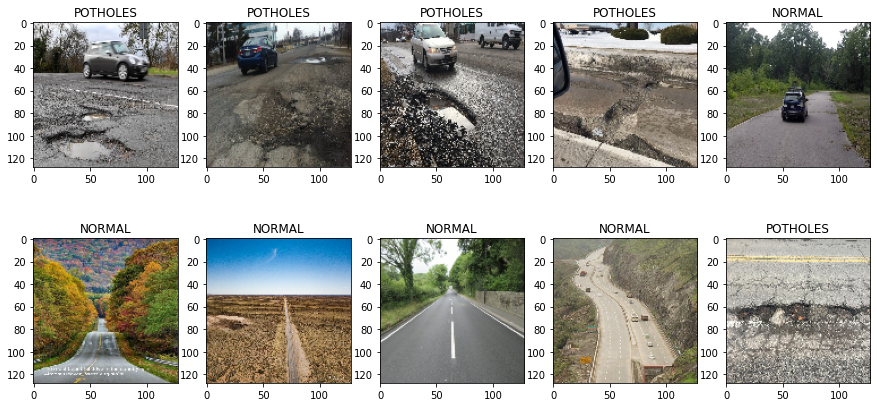

In [ ]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# **Model building**

In [ ]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
training_history=model.fit(x_train, y_train, epochs=40, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/40
43/43 - 13s - loss: 1.4039 - accuracy: 0.6235 - val_loss: 2.4294 - val_accuracy: 0.4824 - 13s/epoch - 296ms/step
Epoch 2/40
43/43 - 1s - loss: 0.6765 - accuracy: 0.6804 - val_loss: 0.4571 - val_accuracy: 0.8294 - 531ms/epoch - 12ms/step
Epoch 3/40
43/43 - 0s - loss: 0.4957 - accuracy: 0.7824 - val_loss: 0.5393 - val_accuracy: 0.7000 - 420ms/epoch - 10ms/step
Epoch 4/40
43/43 - 0s - loss: 0.5255 - accuracy: 0.7647 - val_loss: 0.4755 - val_accuracy: 0.7882 - 423ms/epoch - 10ms/step
Epoch 5/40
43/43 - 0s - loss: 0.4480 - accuracy: 0.8078 - val_loss: 0.5432 - val_accuracy: 0.8059 - 414ms/epoch - 10ms/step
Epoch 6/40
43/43 - 0s - loss: 0.4123 - accuracy: 0.8373 - val_loss: 0.3585 - val_accuracy: 0.8824 - 433ms/epoch - 10ms/step
Epoch 7/40
43/43 - 1s - loss: 0.3689 - accuracy: 0.8667 - val_loss: 0.6816 - val_accuracy: 0.6176 - 520ms/epoch - 12ms/step
Epoch 8/40
43/43 - 0s - loss: 0.3540 - accuracy: 0.8510 - val_loss: 0.4226 - val_accuracy: 0.8588 - 417ms/epoch - 10ms/step
Epoch 9/

# **Visualisation**

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

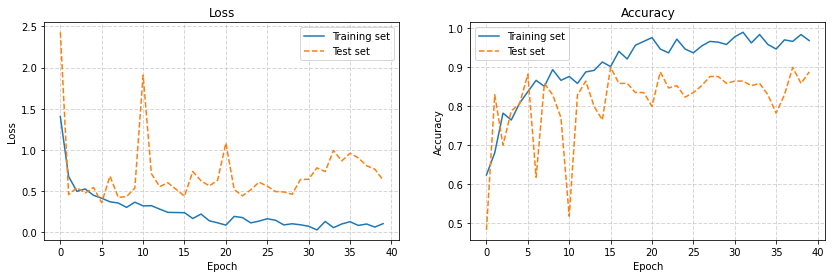

In [ ]:
render_training_history(training_history)

In [ ]:

loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 0s 31ms/step - loss: 0.6324 - accuracy: 0.8882
Test accuracy: 88.82%


In [ ]:
# Making predictions on test data
prediction = model.predict(x_test)

6/6 [==============================] - 0s 6ms/step


In [ ]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

# **F1 Score**

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# assuming you have trained your model and have X_test and y_test data ready
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# compute F1 score
f1score = f1_score(y_true, y_pred_classes, average='macro')
print("F1 score:", f1score)

6/6 [==============================] - 0s 6ms/step
F1 score: 0.8877653844817401


In [ ]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        

In [ ]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred_classes),
            columns=["Predicted NORMAL", "Predicted POTHOLES"],
           index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,70,12
Actual POTHOLES,7,81


Saving the model

In [ ]:
model.save('pothole_detection122_model.h5')

# **Predictions**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained model
model = load_model('/content/pothole_detection122_model.h5')

# Load and preprocess the input image
img = image.load_img('/content/3.jpg', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


# Make predictions on the input image
predictions = model.predict(img_array)

# Print the predicted class label and its confidence score
predicted_class = np.argmax(predictions)
class_confidence = predictions[0][predicted_class]
print("Predicted class:", predicted_class)
print("Class confidence:", class_confidence)

1/1 [==============================] - 0s 256ms/step
Predicted class: 0
Class confidence: 0.99999917


**VG16**

In [ ]:
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.vgg16 import VGG16

# # Load the pre-trained VGG16 model
# vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# # Freeze the weights of the pre-trained layers
# for layer in vgg.layers:
#     layer.trainable = False

# # Add a new classifier layer on top of the pre-trained layers
# x = Flatten()(vgg.output)
# x = Dense(1024, activation='relu')(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
# output = Dense(1, activation='sigmoid')(x)

# # Create a new model
# model = Model(inputs=vgg.input, outputs=output)

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Print the model summary
# model.summary()


In [ ]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_data_dir = '/path/to/train/directory'
# val_data_dir = '/path/to/validation/directory'



In [ ]:
# history = model.fit(train_data, epochs=10, validation_data=val_data)


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Create the VGG16 model
# model = keras.Sequential(name='vgg16')

# # Block 1
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Block 2
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Block 3
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Block 4
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Block 5
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Classification block
# model.add(layers.Flatten())
# model.add(layers.Dense(units=4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=1000, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Load the dataset
# (train_images, train_labels), (val_images, val_labels) = keras.datasets.cifar10.load_data()

# # Preprocess the data
# train_images = train_images / 255.0
# val_images = val_images / 255.0
# train_labels = keras.utils.to_categorical(train_labels)
# val_labels = keras.utils.to_categorical(val_labels)

# # Create data generators for training and validation
# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# train_data = train_data.shuffle(buffer_size=1024).batch(32).repeat()
# steps_per_epoch_train = len(train_images) // 32

# val_data = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
# val_data = val_data.batch(32)
# steps_per_epoch_val = len(val_images) // 32




In [ ]:
# # Load the dataset
# (train_images, train_labels), (val_images, val_labels) = keras.datasets.cifar10.load_data()

# # Resize images to (224, 224)
# train_images = tf.image.resize(train_images, size=(224, 224))
# val_images = tf.image.resize(val_images, size=(224, 224))

# # Preprocess the data
# train_images = train_images / 255.0
# val_images = val_images / 255.0
# train_labels = keras.utils.to_categorical(train_labels)
# val_labels = keras.utils.to_categorical(val_labels)

# # Create data generators for training and validation
# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# train_data = train_data.shuffle(buffer_size=1024).batch(32).repeat()

# val_data = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
# val_data = val_data.batch(32)

# # Train the model
# history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_images)//32, validation_data=val_data)


In [ ]:
# Train the model
# history = model.fit(train_data, epochs=10, steps_per_epoch=steps_per_epoch_train, 
#                     validation_data=val_data, validation_steps=steps_per_epoch_val)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.applications import VGG16

# # Load the pre-trained VGG16 model without the top layers
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Add new layers on top of the pre-trained model
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Set up data generators for loading and augmenting the images
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_data = train_datagen.flow_from_directory('train', target_size=(224, 224), batch_size=32, class_mode='binary')
# val_data = val_datagen.flow_from_directory('val', target_size=(224, 224), batch_size=32, class_mode='binary')

# # Train the model
# history = model.fit(train_data, epochs=10, validation_data=val_data)

# # Evaluate the model on the test set
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_data = test_datagen.flow_from_directory('test', target_size=(224, 224), batch_size=32, class_mode='binary')
# test_loss, test_acc = model.evaluate(test_data)
# print('Test accuracy:', test_acc)


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import os

# #Create the VGG16 model
# model = keras.Sequential(name='vgg16')

# #Block 1
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# #Block 2
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# #Block 3
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# #Block 4
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# ##Block 5
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# #Classification block
# model.add(layers.Flatten())
# model.add(layers.Dense(units=4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=1000, activation='softmax'))

# ##Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# #Print the model summary
# model.summary()

# #Load the dataset
# (train_images, train_labels), (val_images, val_labels) = keras.datasets.cifar10.load_data()

# #Preprocess the data
# train_images = train_images / 255.0
# val_images = val_images / 255.0
# train_labels = keras.utils.to_categorical(train_labels)
# val_labels = keras.utils.to_categorical(val_labels)

# #Create data generators for training and validation
# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# train_data = train_data.shuffle(buffer_size=1024).batch(32).repeat()

# val_data = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
# val_data = val_data.batch(32)

# #Train the model
# history = model.fit(train_data, epochs=10, validation_data=val_data)

# #Save the model
# model.save('vgg16_cifar10.h5')

In [ ]:
# history = model.fit(train_data, epochs=10, validation_data=val_data)

In [ ]:
import tensorflow as tf

In [ ]:
# Load the dataset
(train_images, train_labels), (val_images, val_labels) = keras.datasets.cifar10.load_data()

# Resize images to (224, 224)
train_images = tf.image.resize(train_images, size=(224, 224))
val_images = tf.image.resize(val_images, size=(224, 224))

# Preprocess the data
train_images = train_images / 255.0
val_images = val_images / 255.0
train_labels = keras.utils.to_categorical(train_labels)
val_labels = keras.utils.to_categorical(val_labels)

# Create data generators for training and validation
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.shuffle(buffer_size=1024).batch(32).repeat()

val_data = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_data = val_data.batch(32)

# Train the model
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_images)//32, validation_data=val_data)
